###### Project: Adverse Medical Outcomes Prediction 
##### Data Scientist: Victoria M. Ng 

# Import libraries

In [53]:
# General system libraries
import os
import sys
from IPython.display import Image, Markdown
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Dataframe libraries
import pandas as pd
from pandas import DataFrame, read_csv

# Number manipulation
import scipy.sparse
from scipy.ndimage.filters import generic_filter
import patsy
import numpy as np
from scipy.stats import randint

# Plotting libaries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# Data type libaries
from datetime import datetime as dt

# File manipulation
import pickle
import pandas.io.sql as pd_sql
from sqlalchemy import create_engine
import psycopg2 as pg

# NLP libraries
import wikipedia as wiki
from nltk import word_tokenize, sent_tokenize,FreqDist
from nltk.corpus import stopwords
import gensim as gn
from gensim import corpora, models, similarities
from collections import defaultdict
from six import iteritems
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from spacy.lang.en.stop_words import STOP_WORDS

# Scraping libraries
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
chromedriver = "/home/victoria/projects/metis/Project3/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

# Stats libaries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model, metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import svm, datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
%matplotlib inline


# Other libaries
import geopy

# Import the test and train sets and dummy accuracy

In [37]:
with open('X_train.pkl', 'rb') as picklefile: 
    X_train = pickle.load(picklefile)

In [38]:
with open('X_test.pkl', 'rb') as picklefile: 
    X_test = pickle.load(picklefile)

In [39]:
with open('y_train.pkl', 'rb') as picklefile: 
    y_train = pickle.load(picklefile)

In [40]:
with open('y_test.pkl', 'rb') as picklefile: 
    y_test = pickle.load(picklefile)

In [41]:
with open('X_train_noproduct.pkl', 'rb') as picklefile: 
    X_train_noproduct = pickle.load(picklefile)

In [42]:
with open('X_test_noproduct.pkl', 'rb') as picklefile: 
    X_test_noproduct = pickle.load(picklefile)

In [43]:
with open('y_train_noproduct.pkl', 'rb') as picklefile: 
    y_train_noproduct = pickle.load(picklefile)

In [44]:
with open('y_test_noproduct.pkl', 'rb') as picklefile: 
    y_test_noproduct = pickle.load(picklefile)

In [45]:
with open('dummy_score_noproduct.pkl', 'rb') as picklefile: 
    dummy_score_noproduct = pickle.load(picklefile)

In [49]:
with open('accuracy_bagger_noproduct_tuned.pkl', 'rb') as picklefile: 
    accuracy_bagger_noproduct_tuned = pickle.load(picklefile)

In [70]:
with open('X_noproduct.pkl', 'rb') as picklefile: 
    X_noproduct = pickle.load(picklefile)

In [71]:
with open('y_noproduct.pkl', 'rb') as picklefile: 
    y_noproduct = pickle.load(picklefile)

In [145]:
with open('outcomes_ordered_dict.pkl', 'rb') as picklefile: 
    outcomes_ordered_dict = pickle.load(picklefile)

# Classify without product name feature using random forest classifier class

In [46]:
forest = RandomForestClassifier()

In [47]:
forest.fit(X_train_noproduct, y_train_noproduct)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Compare the random forest accuracy with my tuned bagging model

In [50]:
accuracy_randomforest_noproduct = forest.score(X_test_noproduct, y_test_noproduct)

In [59]:
accuracy_randomforest_noproduct

0.4106337061016284

In [51]:
# Seems like I need the base random forest model is not as accurate as my tuned bagging model
print("My model is {} more accurate than my bagging model".format(accuracy_randomforest_noproduct - accuracy_bagger_noproduct_tuned))

My model is -0.02069845006866783 more accurate than my bagging model


# Try tuning the model without the product name feature

In [ ]:
forest_classifier = RandomForestClassifier(random_state=30)

parameter_grid = {"max_depth": [5, 10, 15, 20],
              'n_estimators': [10, 20, 200, 500],
              "max_features": ['sqrt', 'log2'],
              "min_samples_split": [2, 10],
                }

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(forest_classifier, param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(X_train_noproduct, y_train_noproduct)

print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))

# Compare the tuned random forest accuracy to the dummy model and the tuned bagging model

In [102]:
forest_tuned = RandomForestClassifier(max_depth= 3, max_features= 'sqrt', n_estimators= 1000)

In [103]:
forest_tuned.fit(X_train_noproduct, y_train_noproduct)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
accuracy_randomforest_noproduct_tuned = forest_tuned.score(X_test_noproduct, y_test_noproduct)

In [105]:
accuracy_randomforest_noproduct_tuned

0.3794388856189916

In [106]:
# this random forest is better than the dummy model
print("My model is {}% more accurate than the dummy model".format(int((accuracy_randomforest_noproduct_tuned - dummy_score_noproduct)*100)))

My model is 13% more accurate than the dummy model


In [107]:
# The difference in accuracy between the two models is so small that it should fit within the error range, meaning that these models are performing abotu the same
print("My model is {} more accurate than my bagging model".format(accuracy_randomforest_noproduct_tuned - accuracy_bagger_noproduct_tuned))

My model is -0.05189327055130466 more accurate than my bagging model


# Compare test and train scores to see whethere there's possibly overfitting

In [100]:
# The train accuracy and the test accuracy are lower than the tuned bagging model
# Therefore, I will use the trained bagging model
# More estimators is always better 

train_score = []
test_score = []

for n_estimators in range(200, 1000, 100):
    forest = RandomForestClassifier(max_depth= 3, max_features= 'sqrt', n_estimators= n_estimators)
    forest.fit(X_train_noproduct, y_train_noproduct)
    train_score.append(forest.score(X_train_noproduct, y_train_noproduct))
    test_score.append(forest.score(X_test_noproduct, y_test_noproduct))
    

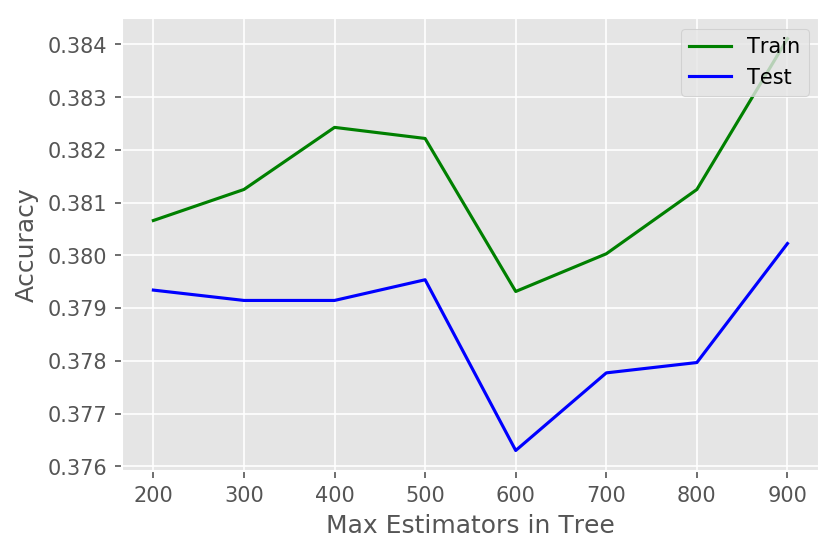

In [101]:
plt.figure(dpi=150)
plt.plot(range(10, 500, 100), train_score, 'g', label="Train")
plt.plot(range(200, 1000, 100), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Estimators in Tree")
plt.ylabel("Accuracy");

# Find the feature importances

In [109]:
forest_tuned.feature_importances_

array([0.42262361, 0.09335069, 0.01625482, 0.00476947, 0.07593816,
       0.03818106, 0.02160145, 0.02551743, 0.02761084, 0.01663229,
       0.0202988 , 0.0163413 , 0.01464804, 0.03026144, 0.03069947,
       0.13740144, 0.00786966])

In [110]:
feature_importance_as_percent =  [100*x for x in forest_tuned .feature_importances_]
feature_importance_as_percent

[42.262361142070326,
 9.335069490899254,
 1.625482161093781,
 0.4769470272670084,
 7.593816307488808,
 3.8181063308483103,
 2.160145435858886,
 2.551743008163186,
 2.761084029344232,
 1.6632291837487663,
 2.0298798408987055,
 1.6341304174394506,
 1.4648042921646685,
 3.026144417222692,
 3.069947342700679,
 13.74014369740749,
 0.7869658753837399]

In [111]:
feature_importances_randomforest = pd.DataFrame(feature_importance_as_percent,
                                   index = X_noproduct.columns,
                                    columns=['Feature Importance %']).sort_values('Feature Importance %', 
                                    ascending=False)

In [112]:
# It seems like age plays the greatest role in the outcome
# Followed by dysbiosis symptom category as a trailing second
# Maybe since I'm still overfitting, I should remove some of the features

# Age in years was the only continuous variable, so it was being used to split over and over 
feature_importances_randomforest

,Feature Importance %
industry_code,42.262361
age_in_years,13.740144
diarrhea,9.335069
upper_respiratory_tract_infection,7.593816
prothrombin_time,3.818106
nephrotoxicity,3.069947
epileptic_seizure,3.026144
drug_overdose,2.761084
nasal_congestion,2.551743
bleeding,2.160145


# Classify with the F1 scores without the product name feature

In [157]:
preds_forest = forest_tuned.predict(X_test_noproduct)

In [158]:
# Looks like I'm not 
print(classification_report(y_test_noproduct, preds_forest))# prints a report for each possible label

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       160
          1       0.00      0.00      0.00       985
          2       0.37      0.11      0.17      2690
          3       0.00      0.00      0.00       442
          4       0.38      0.94      0.54      3791
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00       145
          7       0.00      0.00      0.00      1486
          8       0.00      0.00      0.00       198
          9       0.00      0.00      0.00       293

avg / total       0.24      0.38      0.25     10194



/home/victoria/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [159]:
clf = metrics.precision_recall_fscore_support(y_test_noproduct, preds_forest)

/home/victoria/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [160]:
classification_random_dict = {
             "precision" :clf[0]
            ,"recall" : clf[1]
            ,"f1-score" : clf[2]
            ,"support" : clf[3]
            }
classification_random_df = pd.DataFrame(classification_random_dict, index = forest_tuned_lowbias.classes_)
print(classification_random_df)

   f1-score  precision    recall  support
0  0.000000   0.000000  0.000000      160
1  0.000000   0.000000  0.000000      985
2  0.168868   0.371212  0.109294     2690
3  0.000000   0.000000  0.000000      442
4  0.541802   0.380132  0.942759     3791
5  0.000000   0.000000  0.000000        4
6  0.000000   0.000000  0.000000      145
7  0.000000   0.000000  0.000000     1486
8  0.000000   0.000000  0.000000      198
9  0.000000   0.000000  0.000000      293


In [161]:
classification_random_df['Outcomes'] = list(outcomes_ordered_dict)
classification_random_df

,f1-score,precision,recall,support,Outcomes
0,0.000000,0.000000,0.000000,160,death
1,0.000000,0.000000,0.000000,985,life_threatening
2,0.168868,0.371212,0.109294,2690,serious_injuries_illness
3,0.000000,0.000000,0.000000,442,disability
4,0.541802,0.380132,0.942759,3791,other_serious__important_medical_events_
5,0.000000,0.000000,0.000000,4,congenital_anomaly
6,0.000000,0.000000,0.000000,145,req_intervention_to_prvnt_perm_imprmnt
7,0.000000,0.000000,0.000000,1486,hospitalization
8,0.000000,0.000000,0.000000,198,visited_an_er
9,0.000000,0.000000,0.000000,293,visited_a_health_care_provider


Since I am only learning about two of my classes at this point, I am in a high bias situation. Since I want this to be a general end-user helper, I want to learn about more classes and give more suggestions than just two outcomes (classes). 

In [162]:
with open('classification_random_df.pkl', 'wb') as picklefile:
        pickle.dump(classification_random_df, picklefile)

# Retune to reduce bias

In [116]:
# The train accuracy and the test accuracy are lower than the tuned bagging model
# Therefore, I will use the trained bagging model
# More estimators is always better 

train_score = []
test_score = []

for n_estimators in range(10, 300, 20):
    forest = RandomForestClassifier(max_depth= 3, max_features= 'sqrt', n_estimators= n_estimators)
    forest.fit(X_train_noproduct, y_train_noproduct)
    train_score.append(forest.score(X_train_noproduct, y_train_noproduct))
    test_score.append(forest.score(X_test_noproduct, y_test_noproduct))

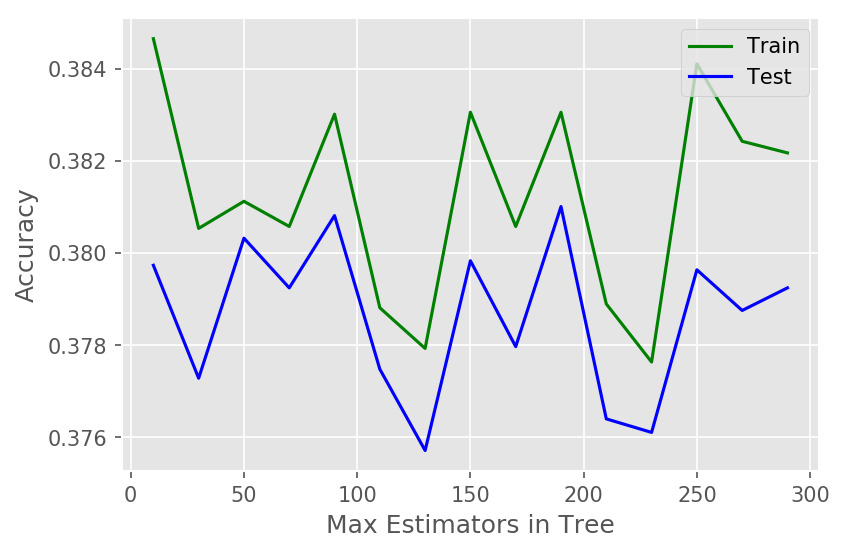

In [117]:
plt.figure(dpi=150)
plt.plot(range(10, 300, 20), train_score, 'g', label="Train")
plt.plot(range(10, 300, 20), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Estimators in Tree")
plt.ylabel("Accuracy");

In [121]:
train_score = []
test_score = []

for depth in range(1,20):
    forest = RandomForestClassifier(max_depth= depth, max_features= 'sqrt', n_estimators= 250)
    forest.fit(X_train_noproduct, y_train_noproduct)
    train_score.append(forest.score(X_train_noproduct, y_train_noproduct))
    test_score.append(forest.score(X_test_noproduct, y_test_noproduct))

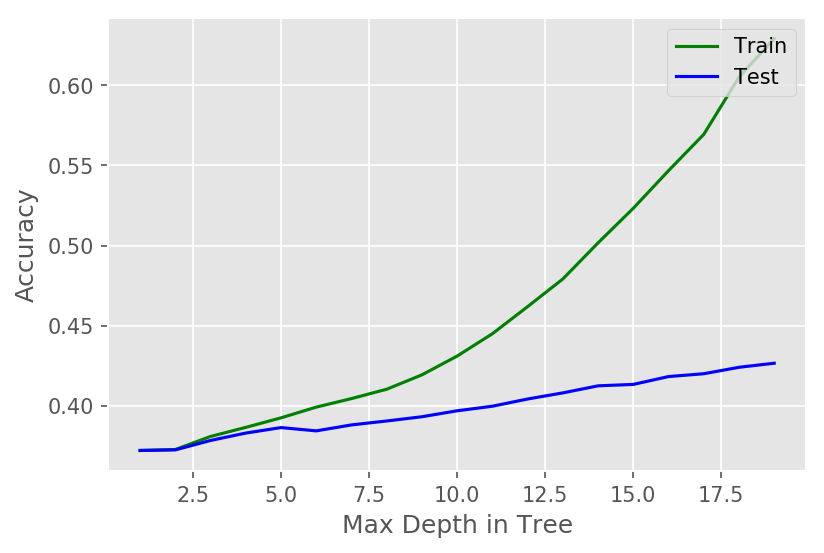

In [122]:
plt.figure(dpi=150)
plt.plot(range(1,20), train_score, 'g', label="Train")
plt.plot(range(1,20), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

In [123]:
forest_tuned_lowbias = RandomForestClassifier(max_depth= 17, max_features= 'sqrt', n_estimators= 250)

In [138]:
forest_tuned_lowbias_fitted = forest_tuned_lowbias.fit(X_train_noproduct, y_train_noproduct)

In [139]:
with open('forest_tuned_lowbias_fitted.pkl', 'wb') as picklefile:
        pickle.dump(forest_tuned_lowbias_fitted, picklefile)

In [125]:
accuracy_randomforest_lowbias_noproduct = forest_tuned_lowbias.score(X_test_noproduct, y_test_noproduct)

In [154]:
accuracy_randomforest_lowbias_noproduct

0.41965862271924664

In [126]:
# this random forest is better than the dummy model
print("My model is {}% more accurate than the dummy model".format(int((accuracy_randomforest_lowbias_noproduct - dummy_score_noproduct)*100)))

My model is 17% more accurate than the dummy model


In [127]:
# Seems like I need the base random forest model is not as accurate as my tuned bagging model
print("My model is {} more accurate than my bagging model".format(accuracy_randomforest_lowbias_noproduct - accuracy_bagger_noproduct_tuned))

My model is -0.0116735334510496 more accurate than my bagging model


# Find the feature importances of the lower bias tuned model

In [128]:
forest_tuned_lowbias.feature_importances_

array([0.10772394, 0.03630805, 0.03809851, 0.01646422, 0.08073992,
       0.05472532, 0.0333956 , 0.06906595, 0.01295924, 0.04106312,
       0.09705012, 0.03705387, 0.02624667, 0.05573969, 0.03389783,
       0.21962237, 0.03984556])

In [129]:
feature_importance_as_percent_lowbias =  [100*x for x in forest_tuned_lowbias.feature_importances_]
feature_importance_as_percent_lowbias

[10.772394242546271,
 3.630804746553052,
 3.8098514335028955,
 1.6464215676258342,
 8.07399216850344,
 5.47253182058813,
 3.3395604206408547,
 6.906595413265605,
 1.2959240478912537,
 4.106312070734605,
 9.705011931581188,
 3.705387293585099,
 2.624667119225993,
 5.573969348738917,
 3.3897834091290346,
 21.962236921541802,
 3.9845560443460193]

In [130]:
feature_importances_randomforest_lowbias = pd.DataFrame(feature_importance_as_percent_lowbias,
                                   index = X_noproduct.columns,
                                    columns=['Feature Importance %']).sort_values('Feature Importance %', 
                                    ascending=False)

In [164]:
feature_importances_randomforest_lowbias

,Feature Importance %
age_in_years,21.962237
industry_code,10.772394
dysbiosis,9.705012
upper_respiratory_tract_infection,8.073992
nasal_congestion,6.906595
epileptic_seizure,5.573969
prothrombin_time,5.472532
angina,4.106312
victim_gender_codes,3.984556
mood_swing,3.809851


In [153]:
with open('feature_importances_randomforest_lowbias.pkl', 'wb') as picklefile:
        pickle.dump(feature_importances_randomforest_lowbias, picklefile)

# Classify with the F1 scores without the product name feature low bias

In [132]:
preds = forest_tuned_lowbias.predict(X_test_noproduct)

In [133]:
print(classification_report(y_test_noproduct, preds))# prints a report for each possible label

             precision    recall  f1-score   support

          0       0.71      0.06      0.11       160
          1       0.58      0.07      0.12       985
          2       0.40      0.31      0.35      2690
          3       0.47      0.04      0.07       442
          4       0.42      0.84      0.56      3791
          5       0.00      0.00      0.00         4
          6       0.30      0.02      0.04       145
          7       0.61      0.10      0.18      1486
          8       0.21      0.02      0.03       198
          9       0.60      0.06      0.11       293

avg / total       0.46      0.42      0.34     10194



/home/victoria/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
classification_report_randomforest_lowbias_pretty = pd.DataFrame(feature_importance_as_percent_lowbias,
                                   index = X_noproduct.columns,
                                    columns=['Feature Importance %']).sort_values('Feature Importance %', 
                                    ascending=False)

# Explore the classification report for lowbias model

In [135]:
clf_rep = metrics.precision_recall_fscore_support(y_test_noproduct, preds)

/home/victoria/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [136]:
classification_random_lowbias_dict = {
             "precision" :clf_rep[0]
            ,"recall" : clf_rep[1]
            ,"f1-score" : clf_rep[2]
            ,"support" : clf_rep[3]
            }
classification_random_lowbias_df = pd.DataFrame(classification_random_lowbias_dict, index = forest_tuned_lowbias.classes_)
print(classification_random_lowbias_df)

   f1-score  precision    recall  support
0  0.114943   0.714286  0.062500      160
1  0.121708   0.577586  0.068020      985
2  0.349140   0.400771  0.309294     2690
3  0.067227   0.470588  0.036199      442
4  0.555274   0.415186  0.838037     3791
5  0.000000   0.000000  0.000000        4
6  0.038710   0.300000  0.020690      145
7  0.175317   0.612903  0.102288     1486
8  0.028302   0.214286  0.015152      198
9  0.111455   0.600000  0.061433      293


In [151]:
classification_random_lowbias_df['Outcome'] = list(outcomes_ordered_dict)
classification_random_lowbias_df

,f1-score,precision,recall,support,Outcome
0,0.114943,0.714286,0.062500,160,death
1,0.121708,0.577586,0.068020,985,life_threatening
2,0.349140,0.400771,0.309294,2690,serious_injuries_illness
3,0.067227,0.470588,0.036199,442,disability
4,0.555274,0.415186,0.838037,3791,other_serious__important_medical_events_
5,0.000000,0.000000,0.000000,4,congenital_anomaly
6,0.038710,0.300000,0.020690,145,req_intervention_to_prvnt_perm_imprmnt
7,0.175317,0.612903,0.102288,1486,hospitalization
8,0.028302,0.214286,0.015152,198,visited_an_er
9,0.111455,0.600000,0.061433,293,visited_a_health_care_provider


In [152]:
with open('classification_random_lowbias_df.pkl', 'wb') as picklefile:
        pickle.dump(classification_random_lowbias_df, picklefile)

# Summary and Takeaways

### What I did 
1. Fitted and predicted on a random forest ensemble method. 
2. Conducted a grid search to determine the paramaters that would provide the highest accuracy.
3. Compared recall between outcomes (targets)
4. Re-tuned the model to adjust for the high bias in order to predict more types of outcomes rather than just get higher overall accuracy or reduce overfitting. 
5. Compared the accuracy to the dummy model and to the bagging model

### What I will do next 
1. Make visualizations for the presentation 

### Takeaways
1. I would want my recall for the more dire outcomes to be higher because I'd rather suggest people who might die see a doctor immediately than tell them they're probably going to be fine
2. Going forward, I would build a layered ensemble model that would have the top tier target be deaths.